### Step 1 Import Libraries


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Step 2 Load and inspect the Data

In [73]:
data = pd.read_csv("data.csv")

In [66]:
print("First 5 rows:\n")
data.head()

First 5 rows:



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0–12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25–48
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0–12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,25–48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0–12


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Step 3 Fix TotalCharges

In [75]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')
data['TotalCharges'].fillna(data['tenure'] * data['MonthlyCharges'], inplace=True)

C:\Users\janna\AppData\Local\Temp\ipykernel_9360\1410094123.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['tenure'] * data['MonthlyCharges'], inplace=True)


In [76]:
data['TotalCharges'].isnull().sum()

np.int64(0)

### Step 4 : Fix SeniorCitizen datatype

In [77]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype('str')

### Step 5 Drop useless column 

In [78]:
data = data.drop('customerID', axis = 1)

In [79]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Step 6: Churn Overview - Piechart

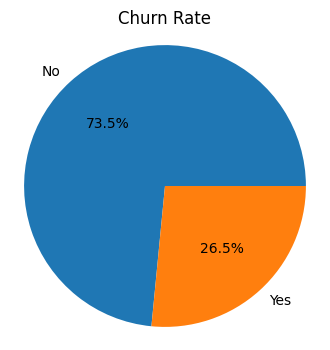

In [80]:
plt.figure(figsize = (4,4))
output_counts = data['Churn'].value_counts()
plt.pie(output_counts, labels = output_counts.index, autopct = '%1.1f%%')
plt.title('Churn Rate')
plt.axis('equal')
plt.ylabel('')
plt.show()

### Step 7: Numeric Summery

In [81]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


### Step 8: Number of Numerical Data and Categorical Data

In [82]:
NumericalData = data.select_dtypes(include=['float', 'int']).columns
print('Numerical Columns:\n', NumericalData )
CategoricalData = data.select_dtypes(include = ['object']).columns
print('Categorical Columns:\n', CategoricalData )

Numerical Columns:
 Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Categorical Columns:
 Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


### Step 9: Churn rate by Numerical features

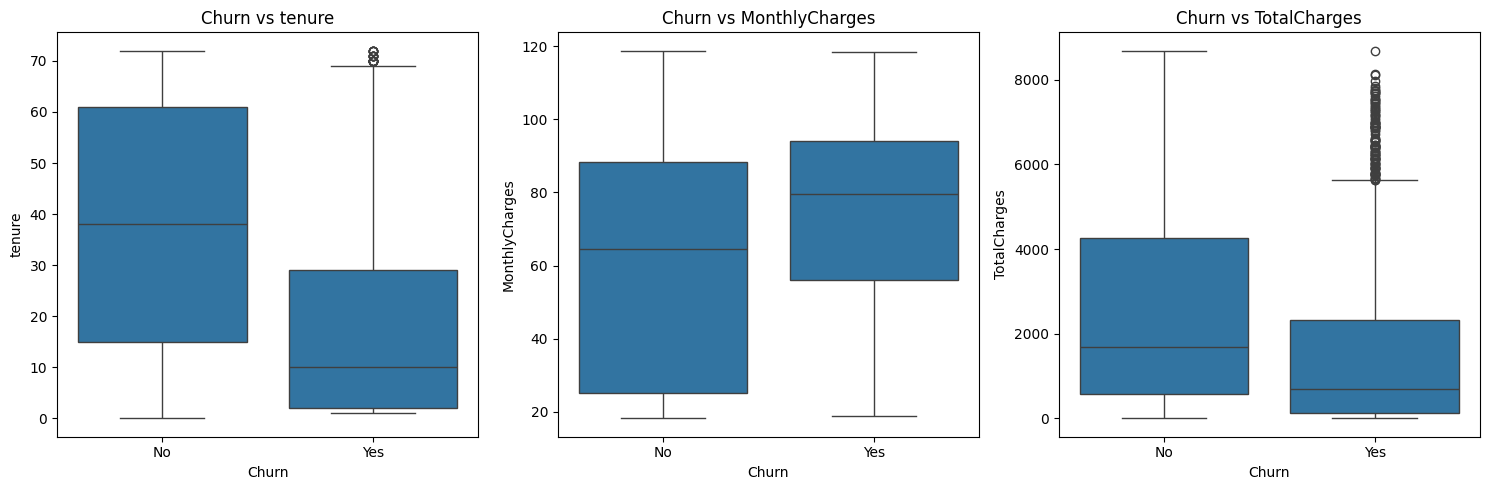

In [83]:
plt.figure(figsize = (15,5))
numerical_col = ['tenure', 'MonthlyCharges', 'TotalCharges']
for i, column in enumerate(numerical_col):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Churn', y=data[column], data=data)
    plt.title(f"Churn vs {column}")
plt.tight_layout()   
plt.show()

    

## Percentage of churn by tenure

In [84]:
churn_rate = data['tenure_group'] = pd.cut(data['tenure'],
                              bins=[0, 12, 24, 48, 72],
                              labels=['0–12', '13–24', '25–48', '49–72'])

churn_by_tenure = data.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack() * 100
print(churn_by_tenure)


Churn                No        Yes
tenure_group                      
0–12          52.321839  47.678161
13–24         71.289062  28.710938
25–48         79.611041  20.388959
49–72         90.486824   9.513176


C:\Users\janna\AppData\Local\Temp\ipykernel_9360\837104796.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = data.groupby('tenure_group')['Churn'].value_counts(normalize=True).unstack() * 100


### Step 10: Churn rate By Categorical features

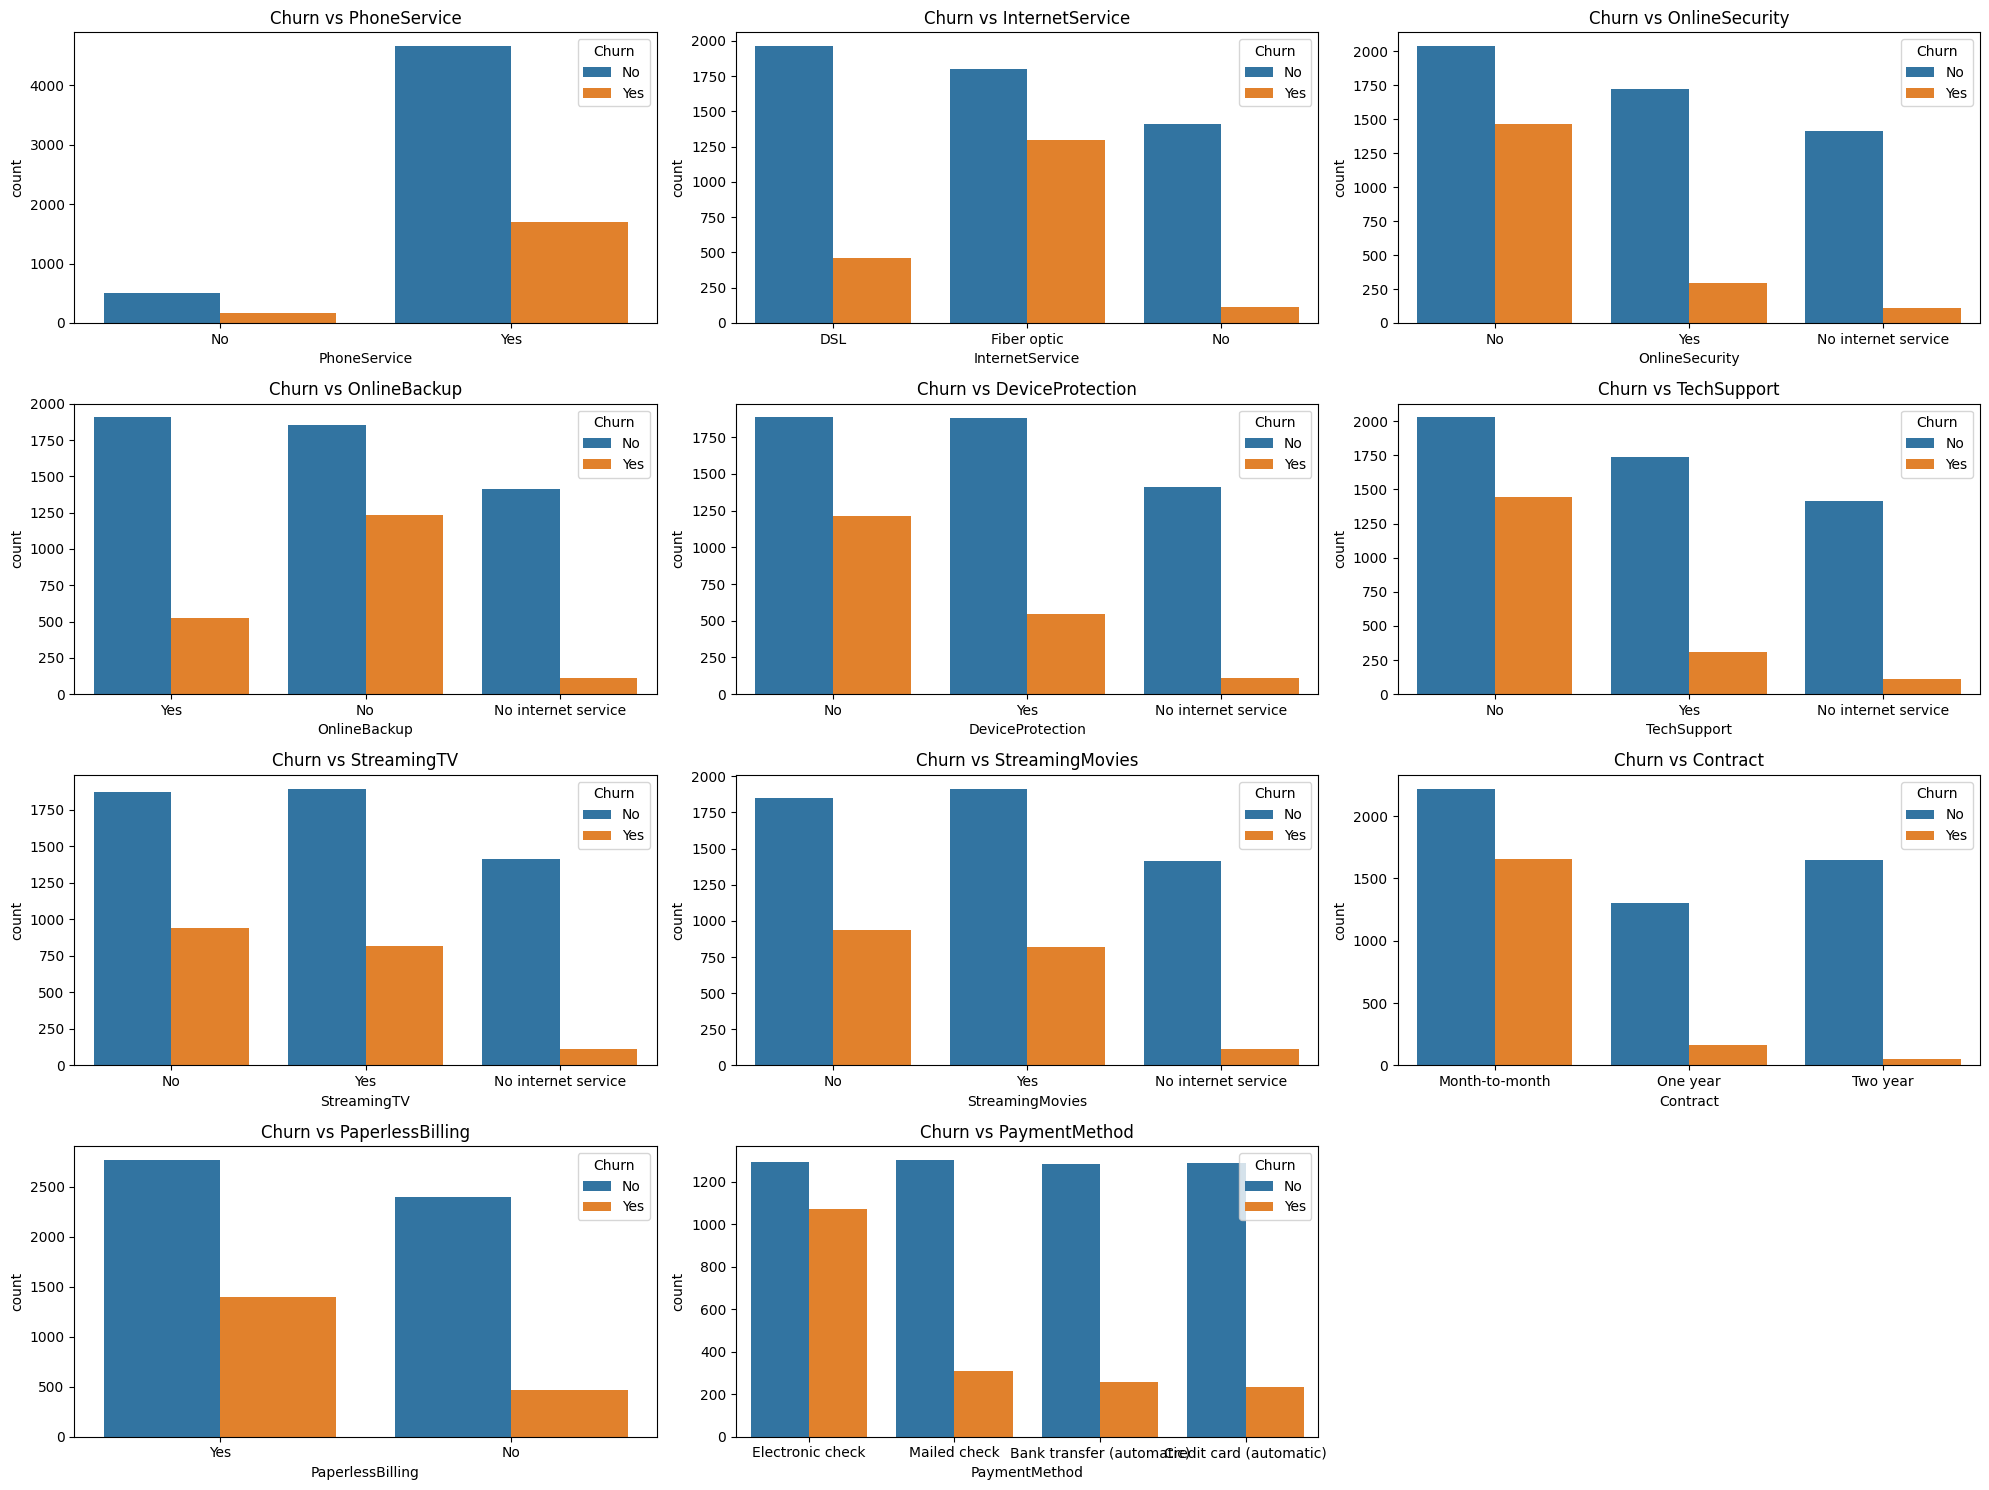

In [85]:
plt.figure(figsize = (20,15))
categorical_col = ['PhoneService',
        'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']
for i, column in enumerate(categorical_col):
    plt.subplot(4, 3, i + 1)
    sns.countplot(x=data[column], hue='Churn', data=data)
    plt.title(f"Churn vs {column}")
plt.tight_layout()   
plt.show()

### Step 11: Rate of Churn in Percentage

In [86]:
categorical_cols = ['Contract', 'InternetService', 'PaymentMethod', 'TechSupport', 'OnlineSecurity']

for col in categorical_cols:
    churn_rate = data.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0) * 100
    print(f"\nChurn percentage by {col}:")
    print(churn_rate.round(2))


Churn percentage by Contract:
Churn              No    Yes
Contract                    
Month-to-month  57.29  42.71
One year        88.73  11.27
Two year        97.17   2.83

Churn percentage by InternetService:
Churn               No    Yes
InternetService              
DSL              81.04  18.96
Fiber optic      58.11  41.89
No               92.60   7.40

Churn percentage by PaymentMethod:
Churn                         No    Yes
PaymentMethod                          
Bank transfer (automatic)  83.29  16.71
Credit card (automatic)    84.76  15.24
Electronic check           54.71  45.29
Mailed check               80.89  19.11

Churn percentage by TechSupport:
Churn                   No    Yes
TechSupport                      
No                   58.36  41.64
No internet service  92.60   7.40
Yes                  84.83  15.17

Churn percentage by OnlineSecurity:
Churn                   No    Yes
OnlineSecurity                   
No                   58.23  41.77
No internet servi

### Summery
From the visulization of both numerical and categorical data it can be said that - Customers with month-to-month contracts, Fiber optic as internet service and Electronic check as payment method churn more than those on long-term plans. Less tenure and Higher monthly charges slightly increase churn likelihood. Tech support and online security appear to reduce churn rates.

## Step 12: Find out Possibility of Churn when combine multiple facts

### High-Risk Combo - InternetService, paymentMethod, Contract

In [96]:
risk = data[(data['InternetService'] == 'Fiber optic') & 
            (data['PaymentMethod'] == 'Electronic check') & 
            (data['Contract'] == 'Month-to-month')]
churn_rate1 = (risk['Churn'] == 'Yes').mean() * 100
print(f"Churn rate: {churn_rate:.1f}%")

Churn rate: 60.4%


### Filter high-risk group: high bill + short tenure

In [97]:
risk = data[(data['MonthlyCharges'] >= 70) & 
            (data['tenure'] <= 12)]

# Calculate churn rate
churn_rate2 = (risk['Churn'] == 'Yes').mean() * 100
print(f"Churn rate for high bill + short tenure: {churn_rate:.1f}%")

Churn rate for high bill + short tenure: 60.4%


### Create bar plot

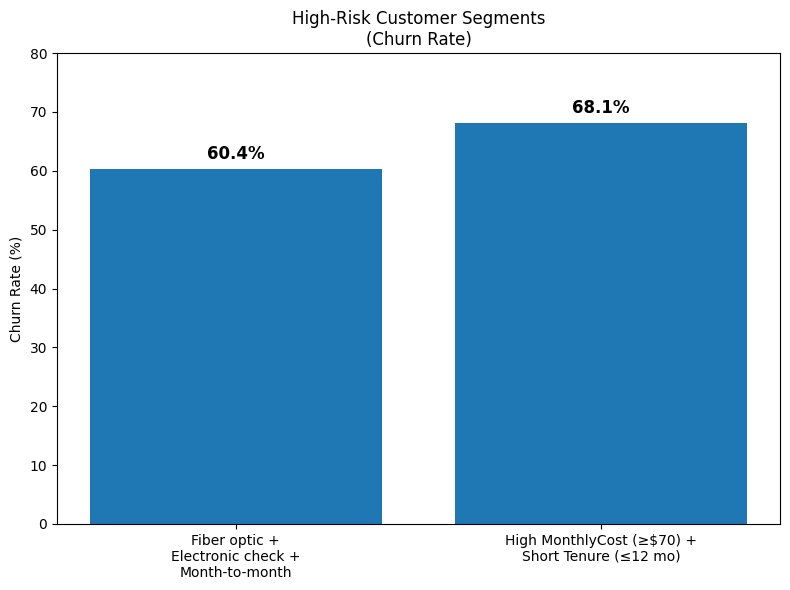

In [101]:
plt.figure(figsize=(8, 6))
segments = ['Fiber optic +\nElectronic check +\nMonth-to-month', 'High MonthlyCost (≥$70) +\nShort Tenure (≤12 mo)']
churn_rates = [churn_rate1, churn_rate2]

bars = plt.bar(segments, churn_rates,)

# Add % on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title('High-Risk Customer Segments\n(Churn Rate)')
plt.ylabel('Churn Rate (%)')
plt.ylim(0, 80)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Now final decision is that,
High monthly cost + short tenure raise 68.1% of churn possibility. To reduce churn we can offer our customers a reward such as - a good amount of discount when they complete one year of subscription with us. besides, We have seen that our additional product like online security and online backup are used less by our customers. We can give them a free 6-month trial to use them so that customers can find our product as value for money. Thus increasing their stay with us and therefore, eventually lowering the churn rate.